<a href="https://colab.research.google.com/github/erivetna87/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/Eric_Rivetna_LS_DS_121_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [472]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-08-13 12:12:06--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.160.69
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.160.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  46.3MB/s    in 4.6s    

2019-08-13 12:12:11 (42.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [473]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [474]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01/instacart_2017_05_01/instacart_2017_05_01/instacart_2017_05_01


In [475]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')



In [477]:
#Evaluate what tables and columns are needed \
# to find the 10 most frequently ordered items are

print('Order Products Train Table:'
     '\n')
print(order_products_train.head())
print('\n'
      '\n')
print('Order Products Prior Table:'
     '\n')
print(order_products_prior.head())
print('\n'
      '\n')
print('Orders Table:'
     '\n')
print(orders.head())
print('\n'
      '\n')
print('Products Table:'
     '\n')
print(products.head())

"""Items not needed for prompt"""
# print('\n'
#       '\n')
# # print('Aisles Table')
# # print(aisles.head())
# print('\n'
#       '\n')
# print('Departments Table')
# print(departments.head())

Order Products Train Table:

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1



Order Products Prior Table:

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0



Orders Table:

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             

Tables Order Products Train Table, Order Products Prior Table, Products Table and columns required:

*   product_id 
*   order_id 
*   product_name



In [478]:
#Reviewing for missing data in the orders table DF
orders_table = pd.concat([order_products_train, order_products_prior])
total_nulls = orders_table.isnull().sum()
print(total_nulls)
# orders_table_col = orders_table.columns.get_values().tolist()
# print(orders_table_col)


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [0]:
#ensuring proper concatenation

assert 1 == 1
assert (order_products_prior.shape[0] + order_products_train.shape[0]) == orders_table.shape[0]
# print(order_products_prior.shape[0] + order_products_train.shape[0])
# print(order_table.shape[0])

In [0]:
#Merging order_table & products table on products_id column
left = orders_table
right = products

total_product_order = pd.merge(left,right,on=['product_id'])


In [481]:
#Checking for null values in total_product_order table
print(total_product_order.isnull().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
product_name         0
aisle_id             0
department_id        0
dtype: int64


In [482]:
#Creating a DataFrame for top 10 Product Orders 
top_10_order_count = pd.Series(total_product_order.groupby('product_name')['product_id'].value_counts().nlargest(10))

top_10_dict = top_10_order_count.to_dict()
top_10_list = top_10_order_count.to_list()

#Creating Dict for DataFrame Object
dfDict = {k:v for k,v in top_10_dict}

#Creating DataFrame Object - orient 'index' must be passed
top10_df = pd.DataFrame.from_dict(dfDict,orient='index',columns=['product_id'])
top10_df.index.name = 'product_name'
top10_df['order_frequency'] = top_10_list
top10_df.reset_index(drop=False,inplace=True)

print('Top 10 Ordered Products:'
      '\n')
print(top10_df)


#Variables for Graphing
top10Prod = top10_df['product_name']
top10Order = top10_df['order_frequency']
  




  



Top 10 Ordered Products:

             product_name  product_id  order_frequency
0                  Banana       24852           491291
1  Bag of Organic Bananas       13176           394930
2    Organic Strawberries       21137           275577
3    Organic Baby Spinach       21903           251705
4    Organic Hass Avocado       47209           220877
5         Organic Avocado       47766           184224
6             Large Lemon       47626           160792
7            Strawberries       16797           149445
8                   Limes       26209           146660
9      Organic Whole Milk       27845           142813


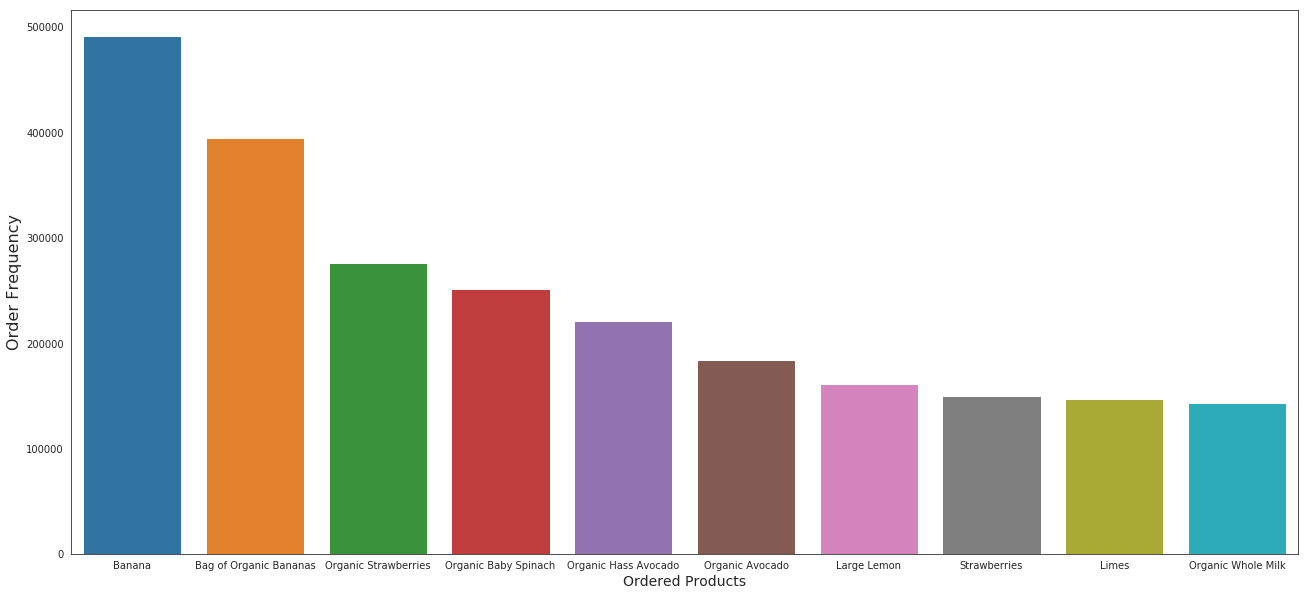

In [483]:
sns.set_style('white')
f, ax = plt.subplots(figsize=(22, 10))
plt.xticks(rotation='horizontal')
sns.barplot(top10Prod,top10Order)
plt.ylabel('Order Frequency', fontsize=16)
plt.xlabel('Ordered Products', fontsize=14)
plt.show()

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

In [485]:
table2col = table2.columns.to_list()
table2index = table2.index.to_list()

table2 = table2.reset_index()
print(table2)



        index  John Smith  Jane Doe  Mary Johnson
0  treatmenta         NaN      16.0           3.0
1  treatmentb         2.0      11.0           1.0


In [0]:
tidy2 = table2.melt(id_vars='index')
tidy2 = table2.melt(id_vars='index',value_vars=['John Smith','Jane Doe','Mary Johnson'])

In [487]:
print(tidy2)

        index      variable  value
0  treatmenta    John Smith    NaN
1  treatmentb    John Smith    2.0
2  treatmenta      Jane Doe   16.0
3  treatmentb      Jane Doe   11.0
4  treatmenta  Mary Johnson    3.0
5  treatmentb  Mary Johnson    1.0


In [0]:
tidy2 = tidy2.rename(index=str, columns={'index': 'trt','variable':'name','value':'result'})



In [0]:
tidy2['trt'] = tidy2['trt'].str.replace('treatment','')

In [490]:
print(tidy2)

  trt          name  result
0   a    John Smith     NaN
1   b    John Smith     2.0
2   a      Jane Doe    16.0
3   b      Jane Doe    11.0
4   a  Mary Johnson     3.0
5   b  Mary Johnson     1.0


In [0]:
tidy2_pivot = tidy2.pivot_table(index='name',columns='trt',values='result')

In [492]:
tidy2_pivot

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


Flights Data

In [0]:
flights = sns.load_dataset('flights')

In [494]:
print('flights shape:', flights.shape,
     '\n')
print('flights head:'
      '\n')
print(flights.head(10))
print('\n'
      '\n')
print('flights tail:'
      '\n')
print(flights.tail(10))


flights shape: (144, 3) 

flights head:

   year      month  passengers
0  1949    January         112
1  1949   February         118
2  1949      March         132
3  1949      April         129
4  1949        May         121
5  1949       June         135
6  1949       July         148
7  1949     August         148
8  1949  September         136
9  1949    October         119



flights tail:

     year      month  passengers
134  1960      March         419
135  1960      April         461
136  1960        May         472
137  1960       June         535
138  1960       July         622
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432


In [495]:
# Checking for null values
print(flights.isnull().sum())

year          0
month         0
passengers    0
dtype: int64


In [0]:
flight_pivot = pd.pivot_table(flights,values='passengers',index=['year'],columns='month',aggfunc=np.sum)

In [497]:
#Pivot Table for Flight Data
flight_pivot

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [513]:
# You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

Jan_1949 = flight_pivot.ix[1949]['January'] == 112
December_1960 = flight_pivot.ix[1960]['December'] == 432



if Jan_1949 & December_1960:
  print('You got {} passengers, which is the correct answer for January 1949'.format(flight_pivot.ix[1949]['January']))
  print('You got {} passengers, which is the correct answer for December 1960'.format(flight_pivot.ix[1960]['December']))

You got 112 passengers, which is the correct answer for January 1949
You got 432 passengers, which is the correct answer for December 1960


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####